In [1]:
import json
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

from os import listdir
from os.path import isfile, join

from dataLoader import load_data_event
from statUtils import perform_regression

In [2]:
# load in all the downloaded data
data_dir = 'data/week2/'
saved_data_files = [f for f in listdir(data_dir) if isfile(join(data_dir, f))]
events = [f"week2/{i[:-5]}" for i in saved_data_files]
events

['week2/2020gadal',
 'week2/2020mabri',
 'week2/2020bcvi',
 'week2/2020onto3',
 'week2/2020arli',
 'week2/2020mdbet',
 'week2/2020misjo',
 'week2/2020txcha',
 'week2/2020mijac',
 'week2/2020inblo',
 'week2/2020mndu',
 'week2/2020qcsh',
 'week2/2020ctwat',
 'week2/2020vagle',
 'week2/2020mimil',
 'week2/2020tuis',
 'week2/2020ncpem',
 'week2/2020mike2',
 'week2/2020onbar',
 'week2/2020cala',
 'week2/2020txpla',
 'week2/2020mndu2',
 'week2/2020cadm',
 'week2/2020waspo',
 'week2/2020txdel',
 'week2/2020utwv',
 'week2/2020ilch',
 'week2/2020mikng']

In [3]:
# load into dataframes
qualification_matches_week_2, team_scores_week_2, team_data_week_2, team_component_opr_week_2 = load_data_event(events[0])
for event in events[1:]:
    event_qualification_matches, event_team_scores, event_team_data, event_team_component_opr = load_data_event(event)
    qualification_matches_week_2 = pd.concat([qualification_matches_week_2, event_qualification_matches])
    team_scores_week_2 = pd.concat([team_scores_week_2, event_team_scores])
    team_data_week_2 = pd.concat([team_data_week_2, event_team_data])
    team_component_opr_week_2 = pd.concat([team_component_opr_week_2, event_team_component_opr])
qualification_matches_week_2

,match_key,match_type,match_number,blue_1_key,blue_2_key,blue_3_key,blue_keys,blue_endgame_level,blue_foul_count,blue_points_scored,...,red_3_init_line,red_1_endgame,red_2_endgame,red_3_endgame,red_cells_bottom_auto,red_cells_bottom_teleop,red_cells_outer_auto,red_cells_outer_teleop,red_cells_inner_auto,red_cells_inner_teleop
11,2020gadal_qm1,qm,1,frc7470,frc4080,frc7883,"[frc7470, frc4080, frc7883]",True,0,12,...,5,25,0,25,0,2,3,9,1,8
12,2020gadal_qm10,qm,10,frc6341,frc6887,frc5900,"[frc6341, frc6887, frc5900]",True,0,5,...,5,5,5,5,0,4,0,0,0,0
13,2020gadal_qm11,qm,11,frc4080,frc7449,frc4026,"[frc4080, frc7449, frc4026]",True,1,34,...,5,0,5,5,0,6,0,0,0,1
14,2020gadal_qm12,qm,12,frc7514,frc3329,frc4910,"[frc7514, frc3329, frc4910]",False,0,100,...,5,5,25,25,0,0,2,17,1,6
15,2020gadal_qm13,qm,13,frc1795,frc5900,frc6712,"[frc1795, frc5900, frc6712]",True,0,20,...,5,0,25,5,0,0,3,13,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2020mikng_qm78,qm,78,frc5878,frc7768,frc2586,"[frc5878, frc7768, frc2586]",False,0,106,...,5,25,25,0,0,0,4,4,1,0
87,2020mikng_qm79,qm,79,frc7790,frc8382,frc5989,"[frc7790, frc8382, frc5989]",True,1,87,...,5,5,25,0,3,11,0,0,0,0
88,2020mikng_qm8,qm,8,frc4391,frc6581,frc3875,"[frc4391, frc6581, frc3875]",False,1,108,...,0,25,5,5,0,0,2,12,1,2
89,2020mikng_qm80,qm,80,frc4715,frc7713,frc4375,"[frc4715, frc7713, frc4375]",False,0,105,...,5,5,0,25,3,16,4,10,2,1


In [9]:
# save dataframes so that we don't have to recalculate component OPR
qualification_matches_week_2.to_csv('data/saved_dataframes/week-2-qualification-matches.csv', index=False)
team_scores_week_2.to_csv('data/saved_dataframes/week-2-team-scores.csv', index=False)
team_data_week_2.to_csv('data/saved_dataframes/week-2-team-data.csv', index=False)
team_component_opr_week_2.to_csv('data/saved_dataframes/week-2-team-component-opr.csv', index=False)

In [12]:
# and for future me, just load them here
qualification_matches_week_2 = pd.read_csv('data/saved_dataframes/week-2-qualification-matches.csv')
team_scores_week_2 = pd.read_csv('data/saved_dataframes/week-2-team-scores.csv')
team_data_week_2 = pd.read_csv('data/saved_dataframes/week-2-team-data.csv')
team_component_opr_week_2 = pd.read_csv('data/saved_dataframes/week-2-team-component-opr.csv')

The first thing that we need to do with this data is see if it is significantly different from the data from week one. If it isn't, than we can (safely) conglomerate the two in order to improve our model and give ourselves more data to work with.

In [6]:
# load in week 1 data to compare
qualification_matches_week_1 = pd.read_csv('data/saved_dataframes/week-1-qualification-matches.csv')
team_scores_week_1 = pd.read_csv('data/saved_dataframes/week-1-team-scores.csv')
team_data_week_1 = pd.read_csv('data/saved_dataframes/week-1-team-data.csv')
team_component_opr_week_1 = pd.read_csv('data/saved_dataframes/week-1-team-component-opr.csv')

In [7]:
# merge dataframes to compare with each other
qualification_matches_week_1['week'] = 1
team_scores_week_1['week'] = 1
team_data_week_1['week'] = 1
team_component_opr_week_1['week'] = 1

qualification_matches_week_2['week'] = 2
team_scores_week_2['week'] = 2
team_data_week_2['week'] = 2
team_component_opr_week_2['week'] = 2

all_qualification_matches = qualification_matches_week_2.append(qualification_matches_week_1)
all_team_scores = team_scores_week_2.append(team_scores_week_1)
all_team_data = team_data_week_2.append(team_data_week_1)
all_team_component_opr = team_component_opr_week_2.append(team_component_opr_week_1)

all_team_component_opr

,Unnamed: 0,team_key,points_scored,points_scored_std,cells_bottom_auto,cells_bottom_auto_std,cells_bottom_teleop,cells_bottom_teleop_std,cells_inner_auto,cells_inner_auto_std,cells_inner_teleop,cells_inner_teleop_std,cells_outer_auto,cells_outer_auto_std,cells_outer_teleop,cells_outer_teleop_std,mean_endgame,mean_score,week
0,0,frc1102,55.015220,18.851101,-0.111623,0.294198,-0.536588,1.509438,0.196522,0.361686,0.343675,0.694347,2.937523,0.883843,6.397633,2.469784,20.000000,96.500000,2
1,1,frc1311,30.731253,23.402091,-0.036147,0.156146,0.728220,1.420681,0.190628,0.580299,0.976167,2.366931,-0.354563,0.589076,1.272643,3.125061,16.250000,77.000000,2
2,2,frc1771,61.560707,20.367695,-0.137373,0.170392,-0.157470,0.872232,0.391186,0.817107,1.740691,1.705282,2.987554,1.482723,6.847973,3.276957,20.000000,107.500000,2
3,3,frc1795,7.360120,16.497112,-0.072511,0.161271,7.061306,5.140229,0.208454,1.309690,-0.128767,1.266230,-0.048603,0.877019,-0.936307,1.407074,3.333333,50.916667,2
4,4,frc2974,55.627928,20.552998,0.009355,0.135118,-1.346746,4.150693,1.983184,1.712490,3.613474,2.596232,1.492296,1.555757,9.121289,4.147174,10.416667,91.083333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,31,frc6420,15.033776,14.212169,0.134289,0.173429,1.555320,1.736087,-0.512904,0.498855,-0.262316,1.122342,0.631215,0.790844,0.632809,3.044985,4.166667,79.000000,1
911,32,frc6805,23.097641,23.301286,0.107642,0.242962,-0.002293,0.716302,0.398861,0.567402,0.237176,0.834792,1.116560,1.731574,2.371266,4.420771,1.666667,77.583333,1
912,33,frc6843,24.520482,19.795723,2.739274,0.863999,1.450874,2.459283,-0.154907,0.572409,-0.226112,0.641718,0.713868,1.305005,0.485671,2.121216,2.916667,81.750000,1
913,34,frc6886,34.434515,14.256964,0.023384,0.205258,-0.364778,1.202902,0.619001,1.159672,0.707401,0.893943,0.709097,1.515481,1.066854,1.414527,13.333333,93.750000,1


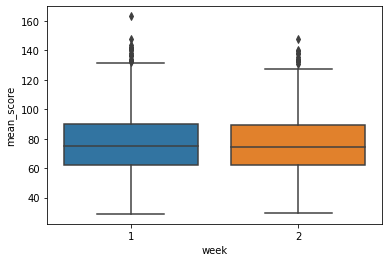

In [21]:
# let's look at boxplots to start
sns.boxplot(x='week', y='mean_score', data=all_team_component_opr)

In [22]:
# run a test to see if they are different distributions (or from different sample)
# use a 2 sample one of these https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test
ks_test = stats.ks_2samp(
    all_team_component_opr.loc[all_team_component_opr['week'] == 1]['mean_score'].values,
    all_team_component_opr.loc[all_team_component_opr['week'] == 2]['mean_score'].values
)
ks_test

Ks_2sampResult(statistic=0.025703689843933657, pvalue=0.8791673461828996)

- H_0: The two samples (week 1 scores and week 2 scores) are the same
- H_a: The two samples are different

p=.87, p<$\alpha$, we can't reject the null hypothesis

There is no evidence to support that week 1 and week 2 scores are significantly different distributions

In [13]:
# now that we know that the two distributions are the same, we can use the conglomerated data together
# we're going to now normalize the component OPR and repeat analysis from before
qualification_matches = all_qualification_matches
team_component_opr = all_team_component_opr
team_data = all_team_data
team_scores = all_team_scores

# go ahead and save these so that we can just skip to here in the future
qualification_matches.to_csv('data/saved_dataframes/week-1-2-qualification-matches.csv')
team_scores.to_csv('data/saved_dataframes/week-1-2-team-scores.csv')
team_data.to_csv('data/saved_dataframes/week-1-2-team-data.csv')
team_component_opr.to_csv('data/saved_dataframes/week-1-2-team-component-opr.csv')

In [14]:
# and load them to skip previous stuff
qualification_matches = pd.read_csv('data/saved_dataframes/week-1-2-qualification-matches.csv')
team_scores = pd.read_csv('data/saved_dataframes/week-1-2-team-scores.csv')
team_data = pd.read_csv('data/saved_dataframes/week-1-2-team-data.csv')
team_component_opr = pd.read_csv('data/saved_dataframes/week-1-2-team-component-opr.csv')

In [15]:
# normalize component OPRs
team_component_opr_normalized = team_component_opr.copy(deep=True)
team_component_opr_normalized['cells_bottom_auto'] *= 2
team_component_opr_normalized['cells_bottom_teleop'] *= 1
team_component_opr_normalized['cells_inner_auto'] *= 6
team_component_opr_normalized['cells_inner_teleop'] *= 3
team_component_opr_normalized['cells_outer_auto'] *= 4
team_component_opr_normalized['cells_outer_teleop'] *= 2

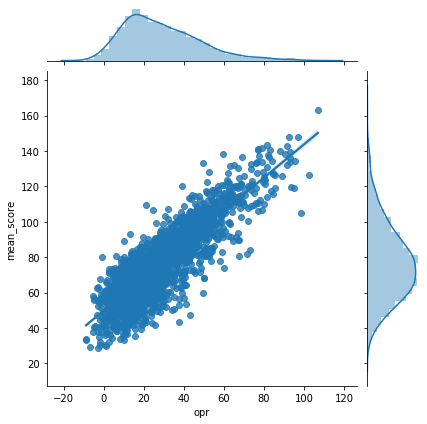

In [16]:
# opr/team data joint plot (just to make sure things exist)
sns.jointplot('opr', 'mean_score', data=team_data, kind='reg')